# Chapter 4 Problem 11

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier 

## Part a

In [123]:
df = pd.read_csv('data/auto.csv')

df['mpg01'] = np.where(df['mpg']<=df['mpg'].median(),0,1)

## Part b

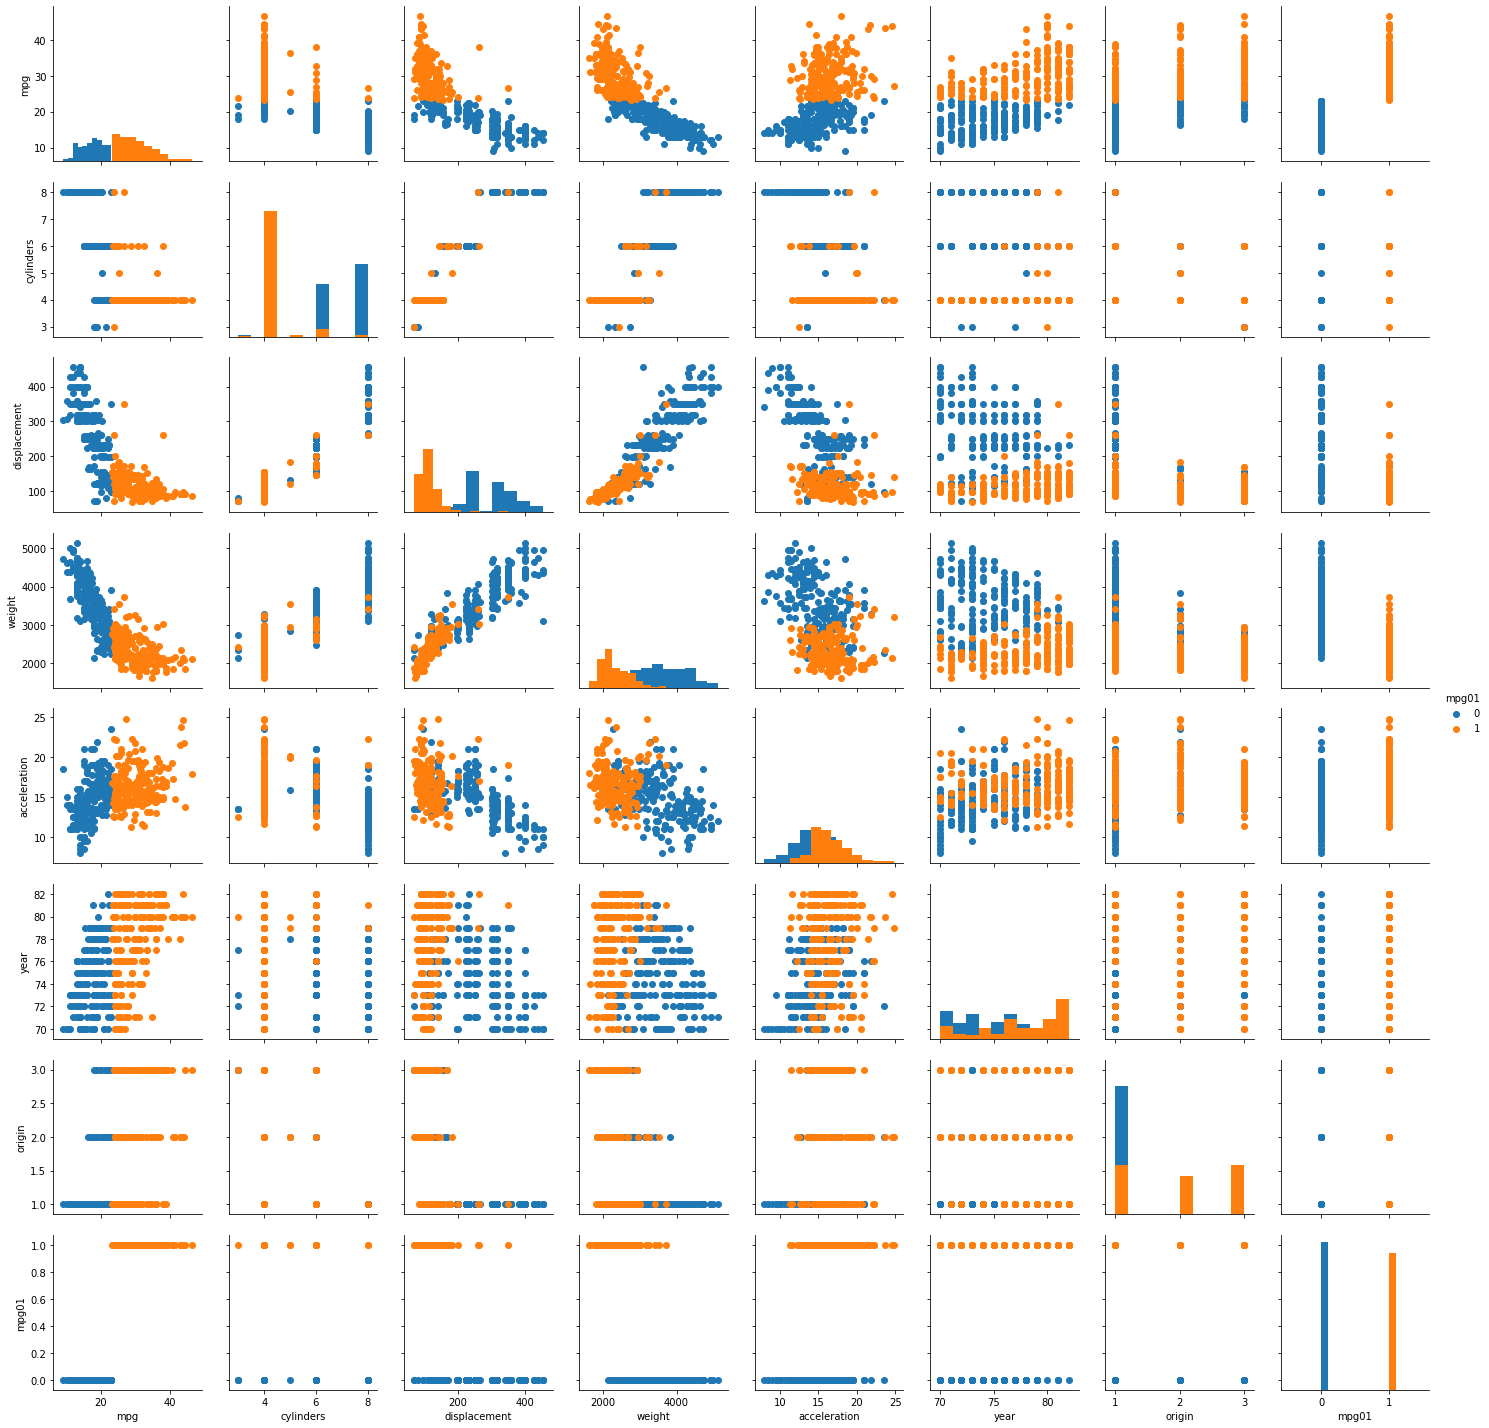

In [124]:
g = sns.PairGrid(df,hue = 'mpg01')
g = g.map_upper(plt.scatter)
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter)
g = g.add_legend()


In [125]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


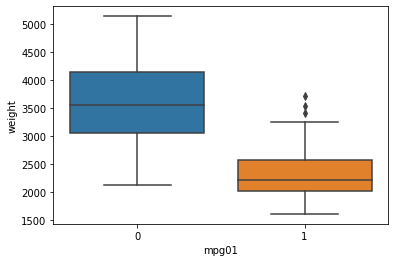

In [126]:
g1 = sns.boxplot(x = df['mpg01'],y = df['weight'] )

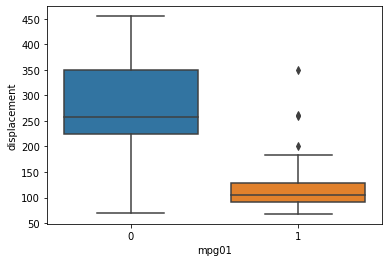

In [127]:
g1 = sns.boxplot(x = df['mpg01'],y = df['displacement'] )

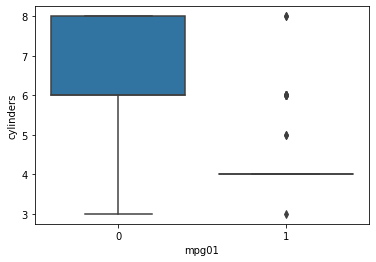

In [128]:
g1 = sns.boxplot(x = df['mpg01'],y = df['cylinders'] )

mpg01 is strongly negatively correlated with weight, displacement, and number of cylinders.

## Part c

In [141]:
x = df[['cylinders','displacement','weight','acceleration','origin','year']]
y = df['mpg01']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 5)


## Part d

In [142]:
lda = LinearDiscriminantAnalysis()
model1 = lda.fit(x_train,y_train)

In [143]:
print("The LDA model test accuracy is:",metrics.accuracy_score(y_test,model1.predict(x_test)))

The LDA model test accuracy is: 0.91


## Part e

In [144]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(x_train,y_train)

In [145]:
print("The QDA model test accuracy is:",metrics.accuracy_score(y_test,model2.predict(x_test)))

The QDA model test accuracy is: 0.91


## Part f

In [153]:
lr = LogisticRegression()
model3 = lr.fit(x_train,y_train)
print("The Logistic Regression model test accuracy is:",metrics.accuracy_score(y_test,model3.predict(x_test)))

The Logistic Regression model test accuracy is: 0.89


/Users/jacobadkins1/.conda/envs/ISLR/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Part f

In [161]:
for k in range(1,101):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    model4 = knn.fit(x_train,y_train)
    print("The K Nearest Neighbors Classifier test accuracy for k = {:} is:".format(k),metrics.accuracy_score(y_test,model4.predict(x_test)))

The K Nearest Neighbors Classifier test accuracy for k = 1 is: 0.87
The K Nearest Neighbors Classifier test accuracy for k = 2 is: 0.86
The K Nearest Neighbors Classifier test accuracy for k = 3 is: 0.85
The K Nearest Neighbors Classifier test accuracy for k = 4 is: 0.87
The K Nearest Neighbors Classifier test accuracy for k = 5 is: 0.87
The K Nearest Neighbors Classifier test accuracy for k = 6 is: 0.87
The K Nearest Neighbors Classifier test accuracy for k = 7 is: 0.83
The K Nearest Neighbors Classifier test accuracy for k = 8 is: 0.85
The K Nearest Neighbors Classifier test accuracy for k = 9 is: 0.84
The K Nearest Neighbors Classifier test accuracy for k = 10 is: 0.85
The K Nearest Neighbors Classifier test accuracy for k = 11 is: 0.84
The K Nearest Neighbors Classifier test accuracy for k = 12 is: 0.85
The K Nearest Neighbors Classifier test accuracy for k = 13 is: 0.84
The K Nearest Neighbors Classifier test accuracy for k = 14 is: 0.85
The K Nearest Neighbors Classifier test acc